# Tutorial for Data

이 Notebook에는 참가자 분들께서 kspace, image data를 보다 쉽게 분석하실 수 있도록 간단한 시각화 예제를 첨부하였습니다.

## Setup

아래 코드를 실행하기 전, 필요한 module을 import합니다.

In [ ]:
# Set up the environment for running a Python script that uses OpenCV and other libraries
!apt update
!apt install -y libgl1

# Install necessary Python packages
%pip install numpy matplotlib h5py opencv-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

## K-space data

kspace data를 담고 있는 h5 file은 아래와 같이 `kspace`, `mask`의 2가지 key를 갖습니다.
- `kspace`: kspace data. (shape: `(slices, coils, height, width)`)
- `mask`: kspace data를 undersampling하기 위한 mask. (shape: `(width, )`)

In [ ]:
in_dir = "/root/Data/train/kspace/brain_acc4_1.h5"
kspace_f = h5py.File(in_dir)
kspace_f.keys()

<KeysViewHDF5 ['kspace', 'mask']>

In [3]:
kspace = kspace_f['kspace']
mask = kspace_f['mask']
print(kspace.shape, mask.shape)

(16, 16, 768, 396) (396,)


이제 kspace data를 시각화 해보겠습니다.

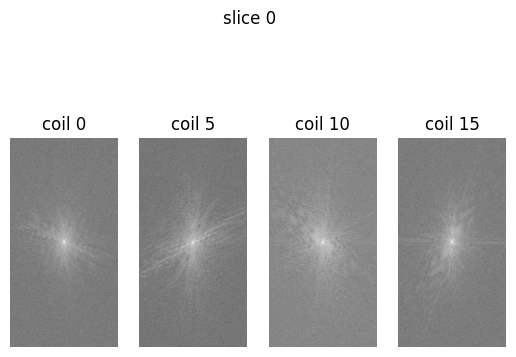

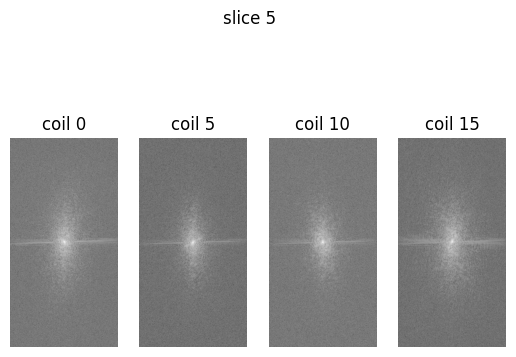

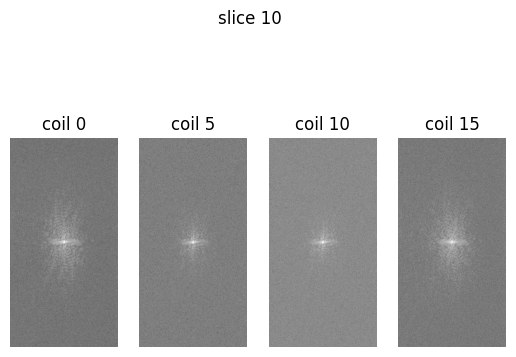

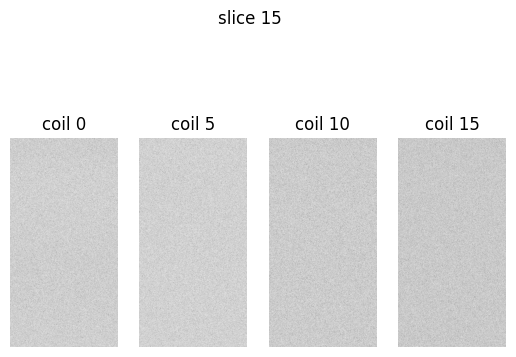

In [4]:
slice_len = kspace.shape[0]
for slice_idx in range(0, slice_len, 5):
    # convert kspace slice to real image
    kspace_slice = kspace[slice_idx]
    kspace_slice = np.log(np.abs(kspace_slice) + 1e-9)

    plt.figure()
    plt.suptitle(f'slice {slice_idx}')
    coil_len = kspace_slice.shape[0]
    for i, coil_idx in enumerate(range(0, coil_len, 5)):
        ax = plt.subplot(1, coil_len // 5 + 1, i + 1)
        plt.title(f'coil {coil_idx}')
        ax.imshow(kspace_slice[coil_idx], cmap='gray')
        plt.axis('off')  # Remove axes for a cleaner look

    plt.show()

위에서 확인하실 수 있듯, 본 challenge에서 다루는 data는 *multi-coil* data입니다. \
그러므로 하나의 slice에 대하여 서로 다른 coil로 얻어진 kspace data가 존재합니다. \
이들에 각각 inverse fourier transform을 취한 뒤, RSS(*root sum squared*) 연산을 취해 하나의 reconstruction image를 얻는 것입니다.

In [5]:
kspace_f.close()

## Image data (brain)

image data를 담고 있는 h5 file은 아래와 같이 `image_grappa`, `image_input`, `image_label`의 3가지 key를 갖습니다.
- `image_grappa`: _GRAPPA method_*를 사용하여 reconstruct한 image
- `image_input`: undersampled kspace data로부터 얻은 **aliased** image
- `image_label`: fully-sampled kspace data로부터 얻은 **aliasing free** image

각 파일에 대해, 세 이미지의 shape는 모두 `(slices, height, width)` 로 동일합니다. \
(*GRAPPA method에 관해서는 본 Challenge의 youtube channel에 설명 영상이 업로드되어 있습니다.)

In [ ]:
in_dir = "/root/Data/train/image/brain_acc4_2.h5"
image_f = h5py.File(in_dir)
image_f.keys()

<KeysViewHDF5 ['image_grappa', 'image_input', 'image_label']>

In [7]:
image_grappa = image_f['image_grappa']
image_input = image_f['image_input']
image_label = image_f['image_label']
print(image_grappa.shape, image_input.shape, image_label.shape)

(16, 384, 384) (16, 384, 384) (16, 384, 384)


이제 image data를 시각화 해보겠습니다.

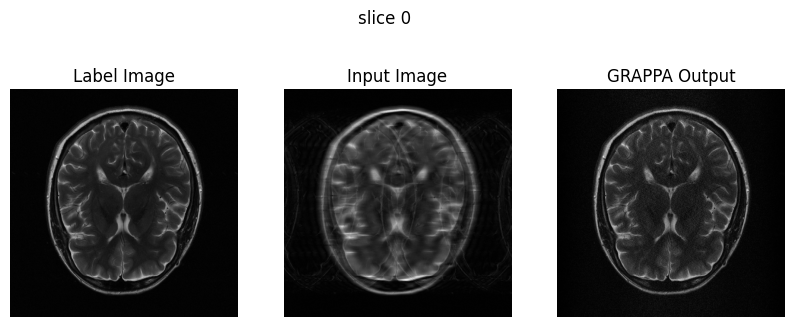

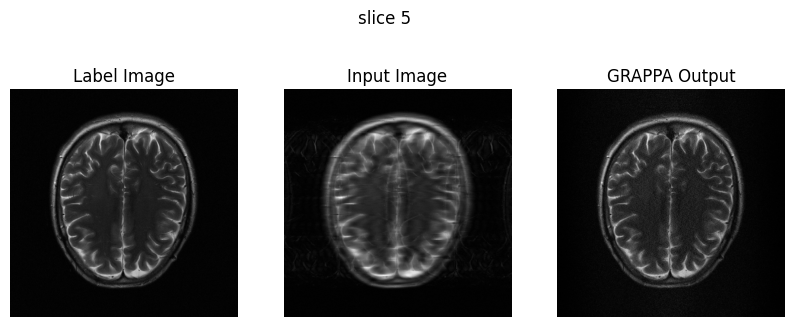

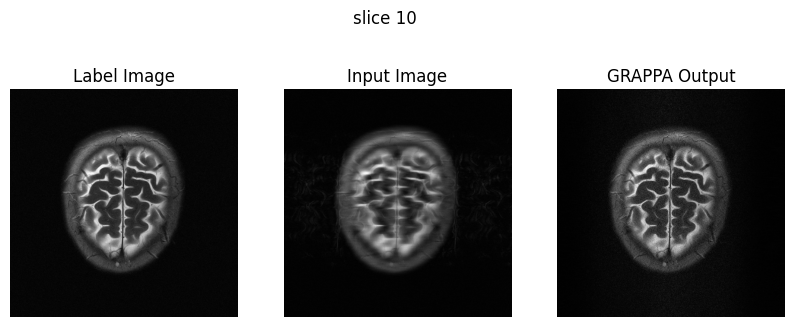

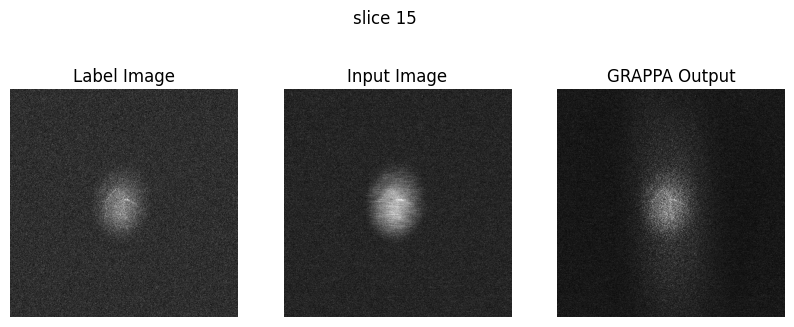

In [8]:
for slice_idx in range(0, image_label.shape[0], 5):
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'slice {slice_idx}')

    ax = plt.subplot(1, 3, 1)
    plt.imshow(image_label[slice_idx], cmap='gray')
    ax.set_title('Label Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 2)
    plt.imshow(image_input[slice_idx], cmap='gray')
    ax.set_title('Input Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 3)
    plt.imshow(image_grappa[slice_idx], cmap='gray')
    ax.set_title('GRAPPA Output')
    ax.axis('off')

    plt.show()

In [13]:
image_f.close()

## Image data (knee)

knee에 대한 kspace, image data도 brain과 파일 형식, shape 등은 동일합니다.

In [ ]:
in_dir = "/root/Data/train/image/knee_acc4_1.h5"
image_f = h5py.File(in_dir)

image_grappa = image_f['image_grappa']
image_input = image_f['image_input']
image_label = image_f['image_label']

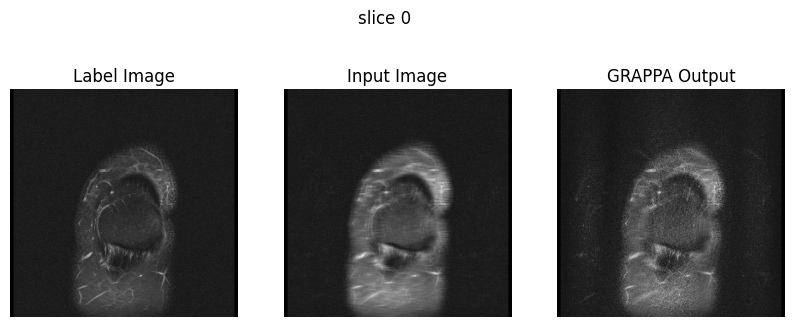

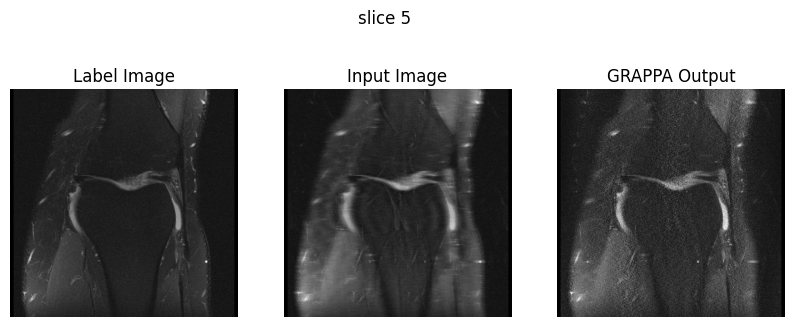

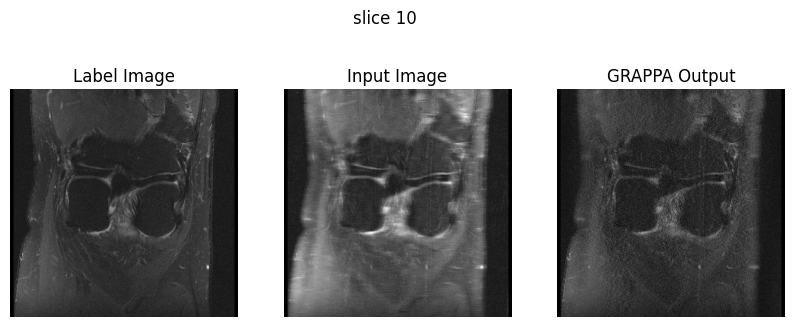

In [16]:
for slice_idx in range(0, image_label.shape[0], 5):
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'slice {slice_idx}')

    ax = plt.subplot(1, 3, 1)
    plt.imshow(image_label[slice_idx], cmap='gray')
    ax.set_title('Label Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 2)
    plt.imshow(image_input[slice_idx], cmap='gray')
    ax.set_title('Input Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 3)
    plt.imshow(image_grappa[slice_idx], cmap='gray')
    ax.set_title('GRAPPA Output')
    ax.axis('off')

    plt.show()

In [17]:
image_f.close()